In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
claimpropagationpath = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/Twitter - FibVID/FibVID-main/claim_propagation/claim_propagation.csv"
claimpropagationdf = pd.read_csv(claimpropagationpath)
claimpropagationdf.head(5)

,tweet_user,tweet_id,like_count,depth,parent_user,create_date,parent_id,retweet_count,post_text,claim_number,group,hashtag
0,64,1260590991641362436,301,0,0,2020-05-13T15:21:27.000Z,0,113,So you left a 69 page guidebook but no PPE or ...,141,1,NaN
1,135,1288771853822103552,194,0,0,2020-07-30T09:42:08.000Z,0,99,More tales from the NHS frontline are emerging...,138,0,NaN
2,290,1251209120528637952,7650,0,0,2020-04-17T18:01:15.000Z,0,4279,DEVELOPING: A crowd of protesters could be see...,30,0,NaN
3,361,1339567071588442113,621,0,0,2020-12-17T13:44:12.000Z,0,231,"Latest we expect on checks, *as of now*, per a...",285,3,NaN
4,457,1265997510738358272,959,0,0,2020-05-28T13:25:02.000Z,0,271,Wisconsin election officials agree to send vot...,35,3,NaN


In [3]:
claimpropagationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221253 entries, 0 to 221252
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tweet_user     221253 non-null  int64 
 1   tweet_id       221253 non-null  int64 
 2   like_count     221253 non-null  int64 
 3   depth          221253 non-null  int64 
 4   parent_user    221253 non-null  int64 
 5   create_date    221253 non-null  object
 6   parent_id      221253 non-null  int64 
 7   retweet_count  221253 non-null  int64 
 8   post_text      217231 non-null  object
 9   claim_number   221253 non-null  int64 
 10  group          221253 non-null  int64 
 11  hashtag        32380 non-null   object
dtypes: int64(9), object(3)
memory usage: 20.3+ MB


In [4]:
claimpropagationdf.dropna(subset=['post_text'], inplace=True)

In [5]:
claimpropagationdf["retweet_count"].describe()

count    217231.000000
mean         94.811523
std        2314.074015
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      673329.000000
Name: retweet_count, dtype: float64

In [6]:
claimpropagationdf["like_count"].describe()

count    2.172310e+05
mean     4.042934e+02
std      1.011531e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      2.833662e+06
Name: like_count, dtype: float64

In [7]:
claimpropagationdf["depth"].describe()

count    217231.000000
mean          1.842997
std           1.028707
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: depth, dtype: float64

In [8]:
claimgroupcount = claimpropagationdf["group"].value_counts()
print(claimgroupcount)

1    131059
3     46759
0     26834
2     12579
Name: group, dtype: int64


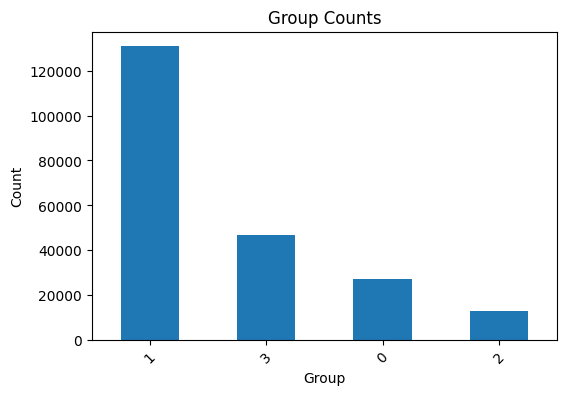

In [9]:
plt.figure(figsize=(6, 4))
claimgroupcount.plot(kind='bar')
plt.title("Group Counts")
plt.xlabel("Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
userinfopath = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/Twitter - FibVID/FibVID-main/user_information/user_information.csv"
userinfodf = pd.read_csv(userinfopath)
userinfodf.head(5)

,following_count,follower_count,creation_date,description,user_id
0,101.0,56.0,2020-03-26 15:57:20,NaN,0
1,8104.0,22533.0,2015-07-21 22:10:47,"People say I’m skeptical, but I don’t believe ...",1
2,598.0,372.0,2019-02-02 19:01:35,Motorcycles. Retired merchant Mariner Captain...,2
3,322.0,203.0,2020-04-01 07:32:57,"Cheese, wine, medieval history, licensed foren...",3
4,102.0,4.0,2020-11-07 13:23:04,NaN,4


In [11]:
userinfodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144741 entries, 0 to 144740
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   following_count  144741 non-null  float64
 1   follower_count   144741 non-null  float64
 2   creation_date    142296 non-null  object 
 3   description      125178 non-null  object 
 4   user_id          144741 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 5.5+ MB


In [12]:
userinfodf['following_count'].describe()

count    144741.000000
mean       2524.772138
std        7547.831679
min           0.000000
25%         309.000000
50%         840.000000
75%        2411.000000
max      601290.000000
Name: following_count, dtype: float64

In [13]:
userinfodf['follower_count'].describe()

count    1.447410e+05
mean     2.088604e+04
std      6.914875e+05
min      0.000000e+00
25%      1.680000e+02
50%      7.030000e+02
75%      2.896000e+03
max      1.276308e+08
Name: follower_count, dtype: float64

In [14]:
df = claimpropagationdf[["tweet_id","post_text","tweet_user","parent_id","parent_user","create_date","like_count","retweet_count","hashtag","depth","group"]].copy()

In [15]:
def count_hashtags(text):
    if pd.isna(text):
        return 0
    count = 1
    for char in text:
        if char == '#':
            count += 1
    return count
df.insert(7, 'hashtag_count', df['hashtag'].apply(count_hashtags))

In [16]:
df['hashtag_count'].describe()

count    217231.000000
mean          0.298963
std           1.054690
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: hashtag_count, dtype: float64

In [17]:
def count_mentions(text):
    if pd.isna(text):
        return 0
    mentions = re.findall(r'@(\w+)', text)
    return len(mentions)
df['mention_count'] = df['post_text'].apply(count_mentions)

In [18]:
df['mention_count'].describe()

count    217231.000000
mean          0.355028
std           1.847289
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: mention_count, dtype: float64

In [19]:
def count_question_marks(text):
    if pd.isna(text):
        return 0
    count = 0
    for char in text:
        if char == '?':
            count += 1
    return count
df['questionmark_count'] = df['post_text'].apply(count_question_marks)

In [20]:
df['questionmark_count'].describe()

count    217231.000000
mean          0.220341
std           0.720972
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: questionmark_count, dtype: float64

In [21]:
def calculate_tweet_length(text):
    if pd.isna(text):
        return 0
    return len(text)
df['tweet_length'] = df['post_text'].apply(calculate_tweet_length)

In [22]:
df['tweet_length'].describe()

count    217231.000000
mean        124.376143
std          84.595566
min           1.000000
25%          57.000000
50%          97.000000
75%         173.000000
max         964.000000
Name: tweet_length, dtype: float64

In [23]:
df['group'].replace({0: 1, 1: 0, 2: 1, 3: 0}, inplace=True)
df.head(5)

,tweet_id,post_text,tweet_user,parent_id,parent_user,create_date,like_count,hashtag_count,retweet_count,hashtag,depth,group,mention_count,questionmark_count,tweet_length
0,1260590991641362436,So you left a 69 page guidebook but no PPE or ...,64,0,0,2020-05-13T15:21:27.000Z,301,0,113,NaN,0,0,0,0,278
1,1288771853822103552,More tales from the NHS frontline are emerging...,135,0,0,2020-07-30T09:42:08.000Z,194,0,99,NaN,0,1,1,0,301
2,1251209120528637952,DEVELOPING: A crowd of protesters could be see...,290,0,0,2020-04-17T18:01:15.000Z,7650,0,4279,NaN,0,1,1,0,302
3,1339567071588442113,"Latest we expect on checks, *as of now*, per a...",361,0,0,2020-12-17T13:44:12.000Z,621,0,231,NaN,0,0,0,0,276
4,1265997510738358272,Wisconsin election officials agree to send vot...,457,0,0,2020-05-28T13:25:02.000Z,959,0,271,NaN,0,0,0,0,93


In [24]:
groupcount = df["group"].value_counts()
print(groupcount)

0    177818
1     39413
Name: group, dtype: int64


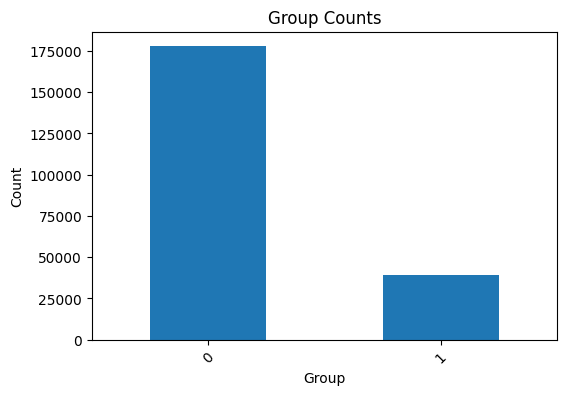

In [25]:
plt.figure(figsize=(6, 4))
groupcount.plot(kind='bar')
plt.title("Group Counts")
plt.xlabel("Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [26]:
!pip install emoji

In [27]:
import emoji
def contains_emoji(text):
    if isinstance(text, str):
        return int(bool(emoji.emoji_count(text)))
    else:
        return 0
df['emoticon'] = df['post_text'].apply(contains_emoji)

In [28]:
emoticoncount = df["emoticon"].value_counts()
print(emoticoncount)

0    193278
1     23953
Name: emoticon, dtype: int64


In [29]:
df1 = userinfodf[["user_id","creation_date","follower_count","following_count","description"]].copy()

In [30]:
from datetime import datetime, timezone
df_no_missing_dates = df1.dropna(subset=['creation_date']).copy()
df_no_missing_dates['creation_date'] = pd.to_datetime(df_no_missing_dates['creation_date'])
current_date = datetime.now()
df_no_missing_dates['account_age'] = (current_date - df_no_missing_dates['creation_date']).dt.days // 365
df1 = pd.merge(df1, df_no_missing_dates[['user_id', 'account_age']], on='user_id', how='left')
df1['account_age'].fillna(-1, inplace=True)
df1.head(5)

,user_id,creation_date,follower_count,following_count,description,account_age
0,0,2020-03-26 15:57:20,56.0,101.0,NaN,4.0
1,1,2015-07-21 22:10:47,22533.0,8104.0,"People say I’m skeptical, but I don’t believe ...",8.0
2,2,2019-02-02 19:01:35,372.0,598.0,Motorcycles. Retired merchant Mariner Captain...,5.0
3,3,2020-04-01 07:32:57,203.0,322.0,"Cheese, wine, medieval history, licensed foren...",4.0
4,4,2020-11-07 13:23:04,4.0,102.0,NaN,3.0


In [31]:
df1["account_age"].describe()

count    144741.000000
mean          9.537235
std           4.125044
min          -1.000000
25%           6.000000
50%          10.000000
75%          13.000000
max          18.000000
Name: account_age, dtype: float64

In [32]:
accountagecount = df1["account_age"].value_counts()
print(accountagecount)

 15.0    16758
 4.0     15081
 14.0    13520
 12.0    13299
 7.0     11338
 13.0    11146
 11.0    10841
 5.0      9295
 10.0     8913
 6.0      8909
 8.0      8149
 9.0      7634
 3.0      4876
-1.0      2445
 16.0     1918
 17.0      618
 18.0        1
Name: account_age, dtype: int64


In [33]:
def count_hashtag(text):
    if pd.isna(text):
        return 0
    count = 0
    for char in text:
        if char == '#':
            count += 1
    return count
df1['hashtag_count'] = df1['description'].apply(count_hashtag)

In [34]:
df1["hashtag_count"].describe()

count    144741.000000
mean          0.706876
std           1.730544
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: hashtag_count, dtype: float64

In [35]:
df1['mention_count'] = df1['description'].apply(count_mentions)

In [36]:
df1["mention_count"].describe()

count    144741.000000
mean          0.230501
std           0.808997
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: mention_count, dtype: float64

In [37]:
df1['description_length'] = df1['description'].apply(calculate_tweet_length)

In [38]:
df1['description_length'].describe()

count    144741.000000
mean         87.860627
std          57.131895
min           0.000000
25%          34.000000
50%          97.000000
75%         144.000000
max         216.000000
Name: description_length, dtype: float64

In [39]:
df1['emoticon'] = df1['description'].apply(contains_emoji)

In [40]:
emoticonscount = df1["emoticon"].value_counts()
print(emoticonscount)

0    114962
1     29779
Name: emoticon, dtype: int64


In [41]:
df1.head(5)

,user_id,creation_date,follower_count,following_count,description,account_age,hashtag_count,mention_count,description_length,emoticon
0,0,2020-03-26 15:57:20,56.0,101.0,NaN,4.0,0,0,0,0
1,1,2015-07-21 22:10:47,22533.0,8104.0,"People say I’m skeptical, but I don’t believe ...",8.0,1,4,147,0
2,2,2019-02-02 19:01:35,372.0,598.0,Motorcycles. Retired merchant Mariner Captain...,5.0,2,0,110,0
3,3,2020-04-01 07:32:57,203.0,322.0,"Cheese, wine, medieval history, licensed foren...",4.0,1,0,125,0
4,4,2020-11-07 13:23:04,4.0,102.0,NaN,3.0,0,0,0,0


In [42]:
data = df[["tweet_id","post_text","tweet_user","parent_id","parent_user","create_date","like_count","retweet_count","hashtag",
           "hashtag_count","depth","mention_count","questionmark_count","tweet_length","emoticon","group"]].copy()
data = pd.merge(data, df1[['creation_date', 'follower_count', 'following_count', 'description', 'account_age',
                           'hashtag_count', 'mention_count', 'description_length', 'emoticon']], left_on='tweet_user', right_on=df1['user_id'],suffixes=('_x', '_y'))

In [43]:
def count_history_tweets(user_id):
    return ((data['tweet_user'] == user_id) | (data['parent_user'] == user_id)).sum()
df1['history_tweets'] = df1['user_id'].apply(count_history_tweets)
df1.head(5)

,user_id,creation_date,follower_count,following_count,description,account_age,hashtag_count,mention_count,description_length,emoticon,history_tweets
0,0,2020-03-26 15:57:20,56.0,101.0,NaN,4.0,0,0,0,0,1758
1,1,2015-07-21 22:10:47,22533.0,8104.0,"People say I’m skeptical, but I don’t believe ...",8.0,1,4,147,0,4
2,2,2019-02-02 19:01:35,372.0,598.0,Motorcycles. Retired merchant Mariner Captain...,5.0,2,0,110,0,1
3,3,2020-04-01 07:32:57,203.0,322.0,"Cheese, wine, medieval history, licensed foren...",4.0,1,0,125,0,2
4,4,2020-11-07 13:23:04,4.0,102.0,NaN,3.0,0,0,0,0,1


In [44]:
data = data.merge(df1["history_tweets"], how='left', left_on='tweet_user', right_on=df1['user_id'])
data['history_tweets'] = data['history_tweets'].astype(int)
group_col = data.pop('group')
data.insert(len(data.columns), 'group', group_col)
data.head(5)

,tweet_id,post_text,tweet_user,parent_id,parent_user,create_date,like_count,retweet_count,hashtag,hashtag_count_x,...,follower_count,following_count,description,account_age,hashtag_count_y,mention_count_y,description_length,emoticon_y,history_tweets,group
0,1260590991641362436,So you left a 69 page guidebook but no PPE or ...,64,0,0,2020-05-13T15:21:27.000Z,301,113,NaN,0,...,28000.0,1017.0,Fmr Deputy Assistant to the SECDEF. Army Helo ...,12.0,0,1,140,1,6,0
1,1257296415849697280,How people act when they get a little bit of p...,64,1256955387066101760,111921,2020-05-04T13:09:59.000Z,19,8,BigBrother,1,...,28000.0,1017.0,Fmr Deputy Assistant to the SECDEF. Army Helo ...,12.0,0,1,140,1,6,0
2,1288771853822103552,More tales from the NHS frontline are emerging...,135,0,0,2020-07-30T09:42:08.000Z,194,99,NaN,0,...,73909.0,2835.0,"Journalist for 25 years, former MEP. Now Chief...",12.0,0,1,158,0,5,1
3,1251209120528637952,DEVELOPING: A crowd of protesters could be see...,290,0,0,2020-04-17T18:01:15.000Z,7650,4279,NaN,0,...,234555.0,7014.0,Thanks for your interest in WCCO/ CBS Minnesot...,16.0,0,0,156,0,138,1
4,1339567071588442113,"Latest we expect on checks, *as of now*, per a...",361,0,0,2020-12-17T13:44:12.000Z,621,231,NaN,0,...,98474.0,1405.0,White House economics reporter for The Washing...,12.0,0,2,156,0,100,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217231 entries, 0 to 217230
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tweet_id            217231 non-null  int64  
 1   post_text           217231 non-null  object 
 2   tweet_user          217231 non-null  int64  
 3   parent_id           217231 non-null  int64  
 4   parent_user         217231 non-null  int64  
 5   create_date         217231 non-null  object 
 6   like_count          217231 non-null  int64  
 7   retweet_count       217231 non-null  int64  
 8   hashtag             32380 non-null   object 
 9   hashtag_count_x     217231 non-null  int64  
 10  depth               217231 non-null  int64  
 11  mention_count_x     217231 non-null  int64  
 12  questionmark_count  217231 non-null  int64  
 13  tweet_length        217231 non-null  int64  
 14  emoticon_x          217231 non-null  int64  
 15  creation_date       215043 non-nul

In [46]:
features = data[["tweet_id","post_text","parent_id","parent_user","create_date","tweet_length","emoticon_x","mention_count_x","hashtag_count_x","like_count","retweet_count","questionmark_count",
                 "tweet_user","follower_count","following_count","history_tweets","account_age","hashtag_count_y","mention_count_y","description_length", "emoticon_y","group"]].copy()
features.head(5)

,tweet_id,post_text,parent_id,parent_user,create_date,tweet_length,emoticon_x,mention_count_x,hashtag_count_x,like_count,...,tweet_user,follower_count,following_count,history_tweets,account_age,hashtag_count_y,mention_count_y,description_length,emoticon_y,group
0,1260590991641362436,So you left a 69 page guidebook but no PPE or ...,0,0,2020-05-13T15:21:27.000Z,278,0,0,0,301,...,64,28000.0,1017.0,6,12.0,0,1,140,1,0
1,1257296415849697280,How people act when they get a little bit of p...,1256955387066101760,111921,2020-05-04T13:09:59.000Z,139,0,0,1,19,...,64,28000.0,1017.0,6,12.0,0,1,140,1,0
2,1288771853822103552,More tales from the NHS frontline are emerging...,0,0,2020-07-30T09:42:08.000Z,301,0,1,0,194,...,135,73909.0,2835.0,5,12.0,0,1,158,0,1
3,1251209120528637952,DEVELOPING: A crowd of protesters could be see...,0,0,2020-04-17T18:01:15.000Z,302,0,1,0,7650,...,290,234555.0,7014.0,138,16.0,0,0,156,0,1
4,1339567071588442113,"Latest we expect on checks, *as of now*, per a...",0,0,2020-12-17T13:44:12.000Z,276,0,0,0,621,...,361,98474.0,1405.0,100,12.0,0,2,156,0,0


In [47]:
features_path = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/features.csv"
features.to_csv(features_path, index=False)

In [48]:
data_df_path = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/datacopy.csv"
data_df = pd.read_csv(data_df_path,index_col=0)
data_df.head()

,text,likes,retweets,description,creation_date,following,followers,history_tweets
0,"This is the new iPad Pro, available for $999 a...",3899,623,The latest Apple news. Not affiliated with App...,3:19 AM - 19 Dec 2014,151,867147,6485


In [49]:
def count_hash(text):
    if pd.isna(text):
        return 0
    count = 0
    for char in text:
        if char == '#':
            count += 1
    return count

In [50]:
def calculate_accountage(creation_date):
    creation_datetime = datetime.strptime(creation_date, '%I:%M %p - %d %b %Y')
    current_datetime = datetime.now()
    account_age = current_datetime.year - creation_datetime.year
    return account_age

In [51]:
data_df.insert(8, 'tweet_length', data_df['text'].apply(calculate_tweet_length))
data_df.insert(9, 'tweet_hashtag', data_df['text'].apply(count_hash))
data_df.insert(10, 'tweet_mention', data_df['text'].apply(count_mentions))
data_df.insert(11, 'tweet_questionmark', data_df['text'].apply(count_question_marks))
data_df.insert(12, 'tweet_emoji', data_df['text'].apply(contains_emoji))
data_df.insert(13, 'bio_length', data_df['description'].apply(calculate_tweet_length))
data_df.insert(14, 'bio_hashtag', data_df['description'].apply(count_hash))
data_df.insert(15, 'bio_mention', data_df['description'].apply(count_mentions))
data_df.insert(16, 'bio_emoji', data_df['description'].apply(contains_emoji))
data_df.insert(17, 'account_age', data_df['creation_date'].apply(calculate_accountage))
data_df.head()

,text,likes,retweets,description,creation_date,following,followers,history_tweets,tweet_length,tweet_hashtag,tweet_mention,tweet_questionmark,tweet_emoji,bio_length,bio_hashtag,bio_mention,bio_emoji,account_age
0,"This is the new iPad Pro, available for $999 a...",3899,623,The latest Apple news. Not affiliated with App...,3:19 AM - 19 Dec 2014,151,867147,6485,66,1,0,0,0,53,0,0,0,10


In [52]:
data_df.drop(['description','creation_date'], axis=1, inplace=True)

In [53]:
data_df.head()

,text,likes,retweets,following,followers,history_tweets,tweet_length,tweet_hashtag,tweet_mention,tweet_questionmark,tweet_emoji,bio_length,bio_hashtag,bio_mention,bio_emoji,account_age
0,"This is the new iPad Pro, available for $999 a...",3899,623,151,867147,6485,66,1,0,0,0,53,0,0,0,10


In [54]:
datapath = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/data.csv"
data_df.to_csv(datapath, index=False)